In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
attributes_df = pd.read_csv("scoutium_attributes.csv",sep=";")
potential_labels_df = pd.read_csv("scoutium_potential_labels.csv",sep=";")

In [3]:
attributes_df.head()

,task_response_id,match_id,evaluator_id,player_id,position_id,analysis_id,attribute_id,attribute_value
0,4915,62935,177676,1361061,2,12818495,4322,56.0
1,4915,62935,177676,1361061,2,12818495,4323,56.0
2,4915,62935,177676,1361061,2,12818495,4324,67.0
3,4915,62935,177676,1361061,2,12818495,4325,56.0
4,4915,62935,177676,1361061,2,12818495,4326,45.0


In [4]:
potential_labels_df.head()

,task_response_id,match_id,evaluator_id,player_id,potential_label
0,4915,62935,177676,1361061,average
1,4915,62935,177676,1361626,highlighted
2,4915,62935,177676,1361858,average
3,4915,62935,177676,1362220,highlighted
4,4915,62935,177676,1364951,highlighted


In [5]:
df = attributes_df.merge(potential_labels_df, how="left", on=["task_response_id", "match_id" , "evaluator_id","player_id"])
df.head()

,task_response_id,match_id,evaluator_id,player_id,position_id,analysis_id,attribute_id,attribute_value,potential_label
0,4915,62935,177676,1361061,2,12818495,4322,56.0,average
1,4915,62935,177676,1361061,2,12818495,4323,56.0,average
2,4915,62935,177676,1361061,2,12818495,4324,67.0,average
3,4915,62935,177676,1361061,2,12818495,4325,56.0,average
4,4915,62935,177676,1361061,2,12818495,4326,45.0,average


In [6]:
df.shape

(10730, 9)

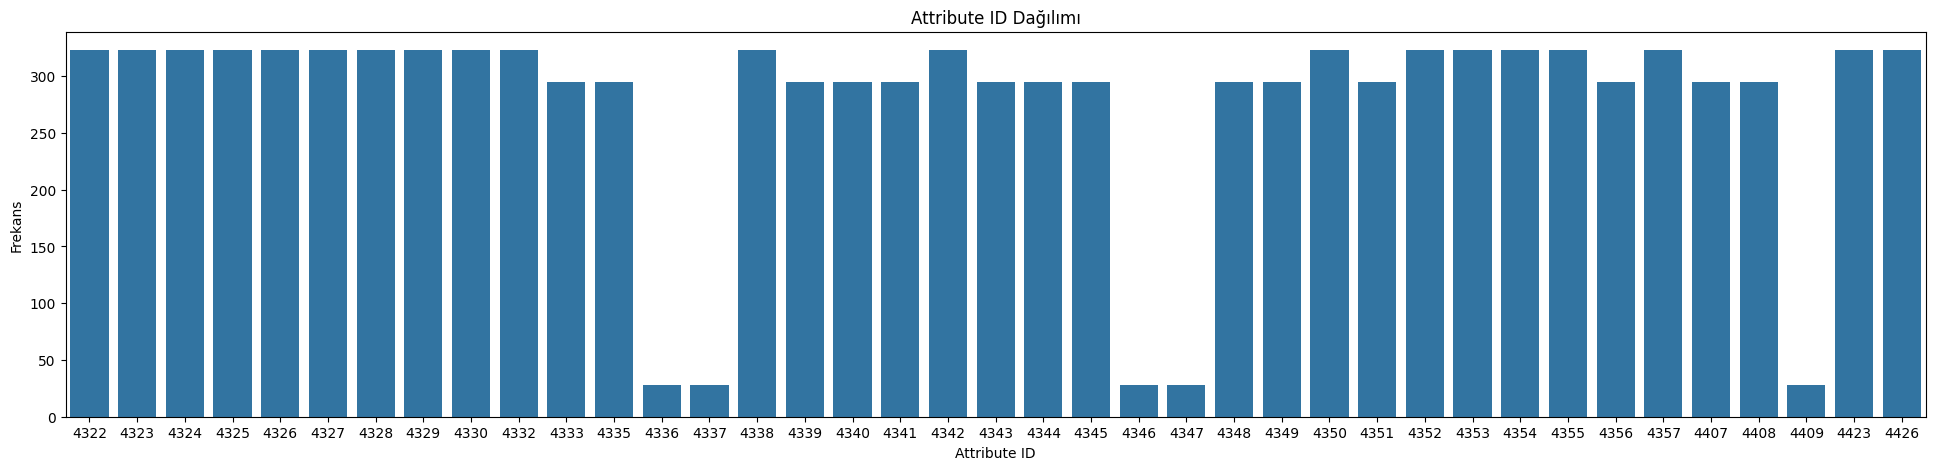

In [7]:
attribute_counts = attributes_df['attribute_id'].value_counts()
plt.figure(figsize=(24,5))
sns.barplot(x=attribute_counts.index, y=attribute_counts.values)
plt.title("Attribute ID Dağılımı")
plt.xlabel("Attribute ID")
plt.ylabel("Frekans")
plt.show()
#Her attribute_id bir oyuncu özelliğini temsil ediyor (örnek: hız, pas, top kontrolü vb.).
#Bu grafikte her özellik için kaç değerlendirme yapıldığını görüyoruz.

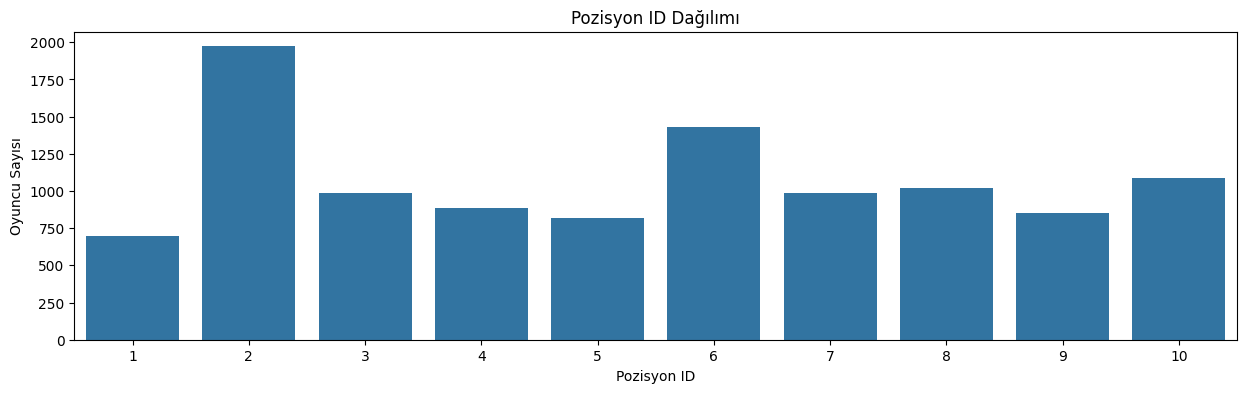

In [8]:
plt.figure(figsize=(15,4))
sns.countplot(x='position_id', data=attributes_df)
plt.title("Pozisyon ID Dağılımı")
plt.xlabel("Pozisyon ID")
plt.ylabel("Oyuncu Sayısı")
plt.show()

In [9]:
df.head()

,task_response_id,match_id,evaluator_id,player_id,position_id,analysis_id,attribute_id,attribute_value,potential_label
0,4915,62935,177676,1361061,2,12818495,4322,56.0,average
1,4915,62935,177676,1361061,2,12818495,4323,56.0,average
2,4915,62935,177676,1361061,2,12818495,4324,67.0,average
3,4915,62935,177676,1361061,2,12818495,4325,56.0,average
4,4915,62935,177676,1361061,2,12818495,4326,45.0,average


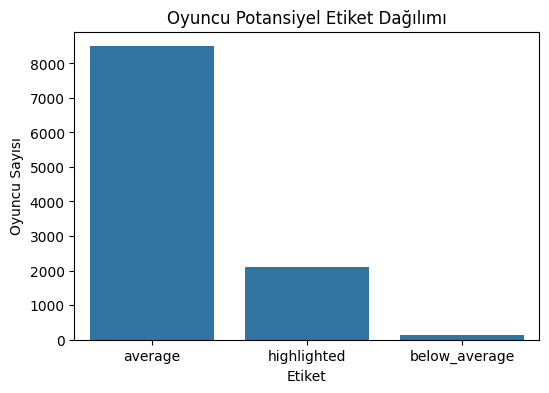

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x='potential_label', data=df)
plt.title("Oyuncu Potansiyel Etiket Dağılımı")
plt.xlabel("Etiket")
plt.ylabel("Oyuncu Sayısı")
plt.show()

In [11]:
df['attribute_value'].describe()
#Burada oyunculara verilen puanların aralıklarını (min, max, ortalama, std) görüyoruz.

count    10730.000000
mean        55.271109
std         16.048040
min          1.000000
25%         45.000000
50%         56.000000
75%         67.000000
max        100.000000
Name: attribute_value, dtype: float64

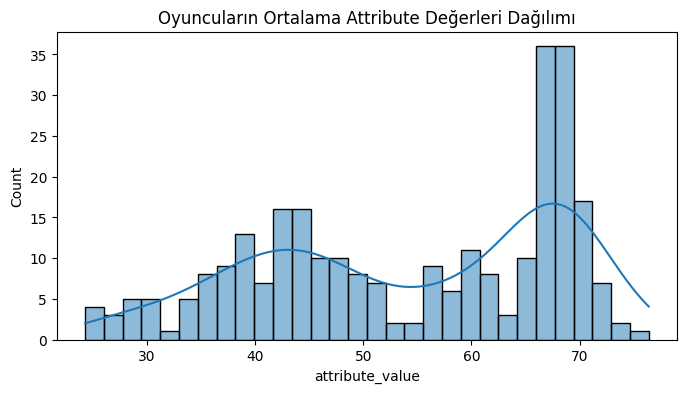

In [12]:
player_mean = df.groupby('player_id')['attribute_value'].mean().reset_index()
plt.figure(figsize=(8,4))
sns.histplot(player_mean['attribute_value'], bins=30, kde=True)
plt.title("Oyuncuların Ortalama Attribute Değerleri Dağılımı")
plt.show()

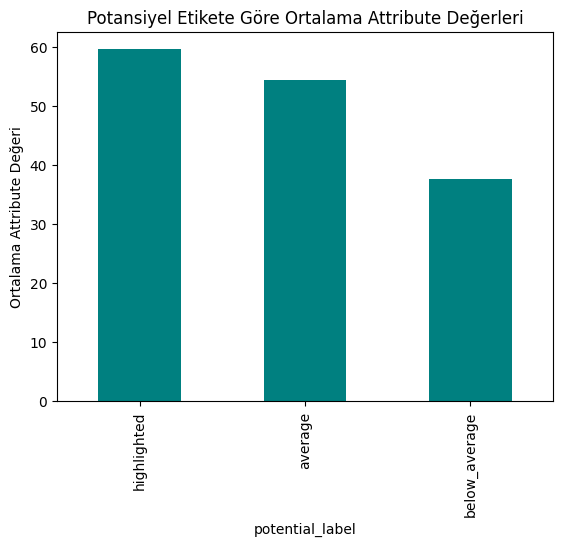

In [13]:
avg_by_label = df.groupby('potential_label')['attribute_value'].mean().sort_values(ascending=False)
avg_by_label.plot(kind='bar', color='teal')
plt.title("Potansiyel Etikete Göre Ortalama Attribute Değerleri")
plt.ylabel("Ortalama Attribute Değeri")
plt.show()

In [14]:
print(df.groupby('position_id')['attribute_value'].mean())
print(df.groupby('potential_label')['attribute_value'].mean())

position_id
1     55.135714
2     54.622211
3     54.047667
4     55.838235
5     59.855392
6     53.881653
7     55.152130
8     54.673529
9     58.225882
10    53.927390
Name: attribute_value, dtype: float64
potential_label
average          54.477580
below_average    37.720588
highlighted      59.624702
Name: attribute_value, dtype: float64


In [15]:
df["task_response_id"].value_counts()

task_response_id
5440    458
5035    433
4970    433
4915    433
5156    399
5259    399
5314    399
5639    399
5621    374
4935    365
4931    365
4919    365
4929    365
5523    365
5465    365
5524    365
5119    365
4997    365
5036    365
5162    365
5319    365
5587    365
5579    365
5618    365
5527    365
5642    365
5003    331
5005    297
5006    170
Name: count, dtype: int64

In [16]:
df["match_id"].value_counts()

match_id
62935    798
62988    798
63166    798
63627    798
63032    764
63696    764
63556    739
62944    730
63406    730
64045    730
63058    696
63061    467
63930    458
60549    365
63862    365
63178    365
61923    365
Name: count, dtype: int64

In [17]:
df["evaluator_id"].value_counts()

evaluator_id
151191    3693
256441    2215
177676    1163
160289     832
132337     798
141254     501
130478     399
135624     399
186987     365
173255     365
Name: count, dtype: int64

In [18]:
df["potential_label"].value_counts()

potential_label
average          8497
highlighted      2097
below_average     136
Name: count, dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10730 entries, 0 to 10729
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   task_response_id  10730 non-null  int64  
 1   match_id          10730 non-null  int64  
 2   evaluator_id      10730 non-null  int64  
 3   player_id         10730 non-null  int64  
 4   position_id       10730 non-null  int64  
 5   analysis_id       10730 non-null  int64  
 6   attribute_id      10730 non-null  int64  
 7   attribute_value   10730 non-null  float64
 8   potential_label   10730 non-null  object 
dtypes: float64(1), int64(7), object(1)
memory usage: 754.6+ KB


In [20]:
df["position_id"].value_counts()

position_id
2     1972
6     1428
10    1088
8     1020
3      986
7      986
4      884
9      850
5      816
1      700
Name: count, dtype: int64

In [21]:
df = df[df["position_id"]!=1] # kalecileri cıkartıyoruz

In [22]:
df["position_id"].value_counts()

position_id
2     1972
6     1428
10    1088
8     1020
7      986
3      986
4      884
9      850
5      816
Name: count, dtype: int64

In [23]:
df = df[df["potential_label"]!="below_average"]

In [24]:
df["potential_label"].value_counts()

potential_label
average        7922
highlighted    1972
Name: count, dtype: int64

In [25]:
scoutium_pivot = df.pivot_table(index=["task_response_id", "match_id", "evaluator_id", "player_id", "position_id","potential_label"],
                                      columns="attribute_id",
                                      values="attribute_value")
scoutium_pivot.head()

attribute_id                                                                  4322  \
task_response_id match_id evaluator_id player_id position_id potential_label         
4915             62935    177676       1361061   2           average          56.0   
                                       1361626   10          highlighted      56.0   
                                       1361858   6           average          45.0   
                                       1362220   5           highlighted      67.0   
                                       1364951   9           highlighted      45.0   

attribute_id                                                                  4323  \
task_response_id match_id evaluator_id player_id position_id potential_label         
4915             62935    177676       1361061   2           average          56.0   
                                       1361626   10          highlighted      67.0   
                                       1361858   6           average          56.0   
                                       1362220   5           highlighted      56.0   
                                       1364951   9           highlighted      56.0   

attribute_id                                                                  4324  \
task_response_id match_id evaluator_id player_id position_id potential_label         
4915             62935    177676       1361061   2           average          67.0   
                                       1361626   10          highlighted      78.0   
                                       1361858   6           average          56.0   
                                       1362220   5           highlighted      56.0   
                                       1364951   9           highlighted      56.0   

attribute_id                                                                  4325  \
task_response_id match_id evaluator_id player_id position_id potential_label         
4915             62935    177676       1361061   2           average          56.0   
                                       1361626   10          highlighted      78.0   
                                       1361858   6           average          56.0   
                                       1362220   5           highlighted      78.0   
                                       1364951   9           highlighted      78.0   

attribute_id                                                                  4326  \
task_response_id match_id evaluator_id player_id position_id potential_label         
4915             62935    177676       1361061   2           average          45.0   
                                       1361626   10          highlighted      56.0   
                                       1361858   6           average          56.0   
                                       1362220   5           highlighted      78.0   
                                       1364951   9           highlighted      78.0   

attribute_id                                                                  4327  \
task_response_id match_id evaluator_id player_id position_id potential_label         
4915             62935    177676       1361061   2           average          56.0   
                                       1361626   10          highlighted      56.0   
                                       1361858   6           average          45.0   
                                       1362220   5           highlighted      78.0   
                                       1364951   9           highlighted      56.0   

attribute_id                                                                  4328  \
task_response_id match_id evaluator_id player_id position_id potential_label         
4915             62935    177676       1361061   2           average          56.0   
                                       1361626   10          highlighted      78.0   
                                      

In [26]:
scoutium_pivot.shape

(290, 34)

In [27]:
scoutium_pivot = df.pivot_table(index=["player_id", "position_id", "potential_label"],
                                      columns="attribute_id",
                                      values="attribute_value")
scoutium_pivot.head()

attribute_id                           4322  4323  4324  4325  4326  4327  \
player_id position_id potential_label                                       
1355710   7           average          50.5  50.5  34.0  50.5  45.0  45.0   
1356362   9           average          67.0  67.0  67.0  67.0  67.0  67.0   
1356375   3           average          67.0  67.0  67.0  67.0  67.0  67.0   
          4           average          67.0  78.0  67.0  67.0  67.0  78.0   
1356411   9           average          67.0  67.0  78.0  78.0  67.0  67.0   

attribute_id                           4328  4329  4330  4332  ...  4352  \
player_id position_id potential_label                          ...         
1355710   7           average          45.0  45.0  50.5  56.0  ...  56.0   
1356362   9           average          67.0  67.0  67.0  67.0  ...  67.0   
1356375   3           average          67.0  78.0  67.0  67.0  ...  67.0   
          4           average          78.0  78.0  56.0  67.0  ...  78.0   
1356411   9           average          67.0  67.0  89.0  78.0  ...  67.0   

attribute_id                           4353  4354  4355  4356  4357  4407  \
player_id position_id potential_label                                       
1355710   7           average          34.0  39.5  50.5  34.0  34.0  56.0   
1356362   9           average          67.0  78.0  67.0  67.0  67.0  67.0   
1356375   3           average          67.0  78.0  67.0  67.0  67.0  67.0   
          4           average          67.0  67.0  67.0  56.0  67.0  56.0   
1356411   9           average          56.0  67.0  67.0  56.0  67.0  89.0   

attribute_id                           4408  4423  4426  
player_id position_id potential_label                    
1355710   7           average          34.0  34.0  56.0  
1356362   9           average          67.0  56.0  78.0  
1356375   3           average          67.0  56.0  78.0  
          4           average          67.0  45.0  56.0  
1356411   9           average          56.0  67.0  78.0  

[5 rows x 34 columns]

In [28]:
scoutium_pivot.shape

(271, 34)

In [29]:
scoutium_pivot.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 271 entries, (np.int64(1355710), np.int64(7), 'average') to (np.int64(1909728), np.int64(7), 'highlighted')
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   4322    271 non-null    float64
 1   4323    271 non-null    float64
 2   4324    271 non-null    float64
 3   4325    271 non-null    float64
 4   4326    271 non-null    float64
 5   4327    271 non-null    float64
 6   4328    271 non-null    float64
 7   4329    271 non-null    float64
 8   4330    271 non-null    float64
 9   4332    271 non-null    float64
 10  4333    271 non-null    float64
 11  4335    271 non-null    float64
 12  4338    271 non-null    float64
 13  4339    271 non-null    float64
 14  4340    271 non-null    float64
 15  4341    271 non-null    float64
 16  4342    271 non-null    float64
 17  4343    271 non-null    float64
 18  4344    271 non-null    float64
 19  4345    271 non-null    flo

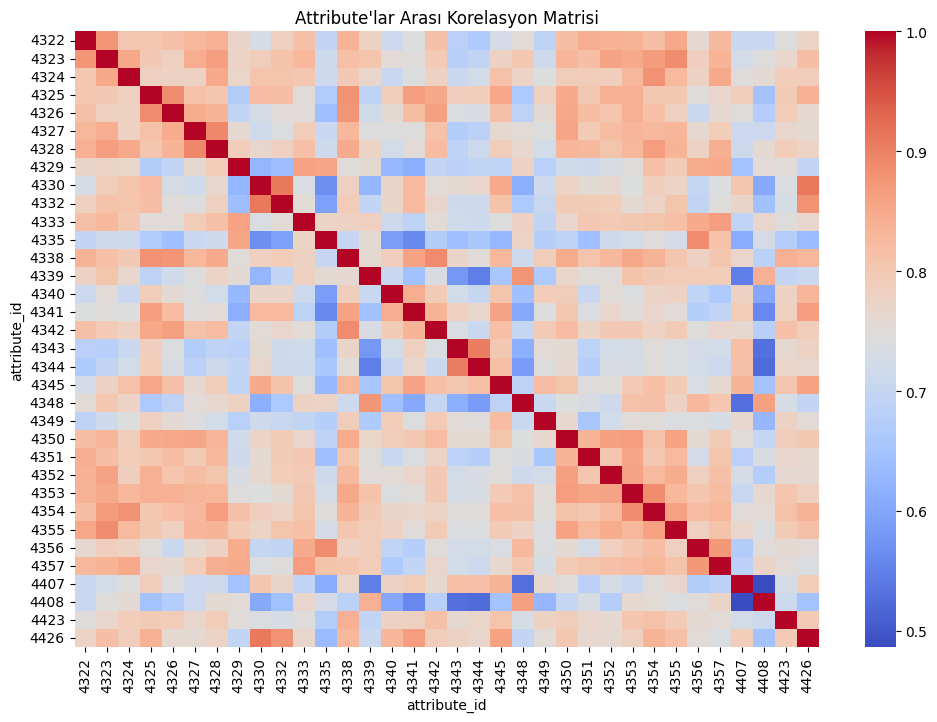

In [30]:
corr = scoutium_pivot.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap='coolwarm')
plt.title("Attribute'lar Arası Korelasyon Matrisi")
plt.show()

In [31]:
scoutium_pivot = scoutium_pivot.reset_index()     
scoutium_pivot.columns = scoutium_pivot.columns.astype(str)

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
scoutium_pivot["potential_label"] = le.fit_transform(scoutium_pivot["potential_label"])

In [33]:
scoutium_pivot.head()

attribute_id,player_id,position_id,potential_label,4322,4323,4324,4325,4326,4327,4328,...,4352,4353,4354,4355,4356,4357,4407,4408,4423,4426
0,1355710,7,0,50.5,50.5,34.0,50.5,45.0,45.0,45.0,...,56.0,34.0,39.5,50.5,34.0,34.0,56.0,34.0,34.0,56.0
1,1356362,9,0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,...,67.0,67.0,78.0,67.0,67.0,67.0,67.0,67.0,56.0,78.0
2,1356375,3,0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,...,67.0,67.0,78.0,67.0,67.0,67.0,67.0,67.0,56.0,78.0
3,1356375,4,0,67.0,78.0,67.0,67.0,67.0,78.0,78.0,...,78.0,67.0,67.0,67.0,56.0,67.0,56.0,67.0,45.0,56.0
4,1356411,9,0,67.0,67.0,78.0,78.0,67.0,67.0,67.0,...,67.0,56.0,67.0,67.0,56.0,67.0,89.0,56.0,67.0,78.0


In [34]:
num_cols = [col for col in scoutium_pivot.columns if col not in ["player_id", "position_id", "potential_label"]]
scoutium_pivot_num = scoutium_pivot[num_cols]

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data in num_cols
scaler.fit(scoutium_pivot[num_cols])

# Transform the data in num_cols
scoutium_pivot[num_cols] = scaler.transform(scoutium_pivot[num_cols])

scoutium_pivot[num_cols].head()

attribute_id,4322,4323,4324,4325,4326,4327,4328,4329,4330,4332,...,4352,4353,4354,4355,4356,4357,4407,4408,4423,4426
0,-0.542606,-0.559398,-1.404764,-0.437916,-0.766602,-0.794802,-0.907351,-0.791605,-0.446324,-0.122619,...,0.012848,-1.281899,-1.132245,-0.494569,-1.234869,-1.519578,-0.142650,-1.487256,-0.955381,-0.252741
1,0.595327,0.560776,0.678677,0.682837,0.722639,0.722929,0.601190,0.404075,0.727985,0.691171,...,0.786581,0.813645,1.052769,0.631718,0.914913,0.768231,0.529664,0.668713,0.403717,1.041611
2,0.595327,0.560776,0.678677,0.682837,0.722639,0.722929,0.601190,1.001915,0.727985,0.691171,...,0.786581,0.813645,1.052769,0.631718,0.914913,0.768231,0.529664,0.668713,0.403717,1.041611
3,0.595327,1.307560,0.678677,0.682837,0.722639,1.481795,1.355461,1.001915,-0.054888,0.691171,...,1.560314,0.813645,0.428479,0.631718,0.198319,0.768231,-0.142650,0.668713,-0.275832,-0.252741
4,0.595327,0.560776,1.373158,1.430006,0.722639,0.722929,0.601190,0.404075,2.293730,1.504961,...,0.786581,0.115130,0.428479,0.631718,0.198319,0.768231,1.874292,-0.049944,1.083267,1.041611


In [36]:
X = scoutium_pivot.drop(["potential_label", "player_id"], axis=1)
y = scoutium_pivot["potential_label"]

In [37]:
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
X_test.shape

(55, 35)

In [39]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10, random_state=15)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=15)

In [40]:
y_pred = rfc.predict(X_test)
from sklearn.metrics import accuracy_score
print(f'Model accuracy score with 10 decision-trees : {accuracy_score(y_test, y_pred)}')

Model accuracy score with 10 decision-trees : 0.8545454545454545


In [41]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[44  0]
 [ 8  3]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        44
           1       1.00      0.27      0.43        11

    accuracy                           0.85        55
   macro avg       0.92      0.64      0.67        55
weighted avg       0.88      0.85      0.82        55



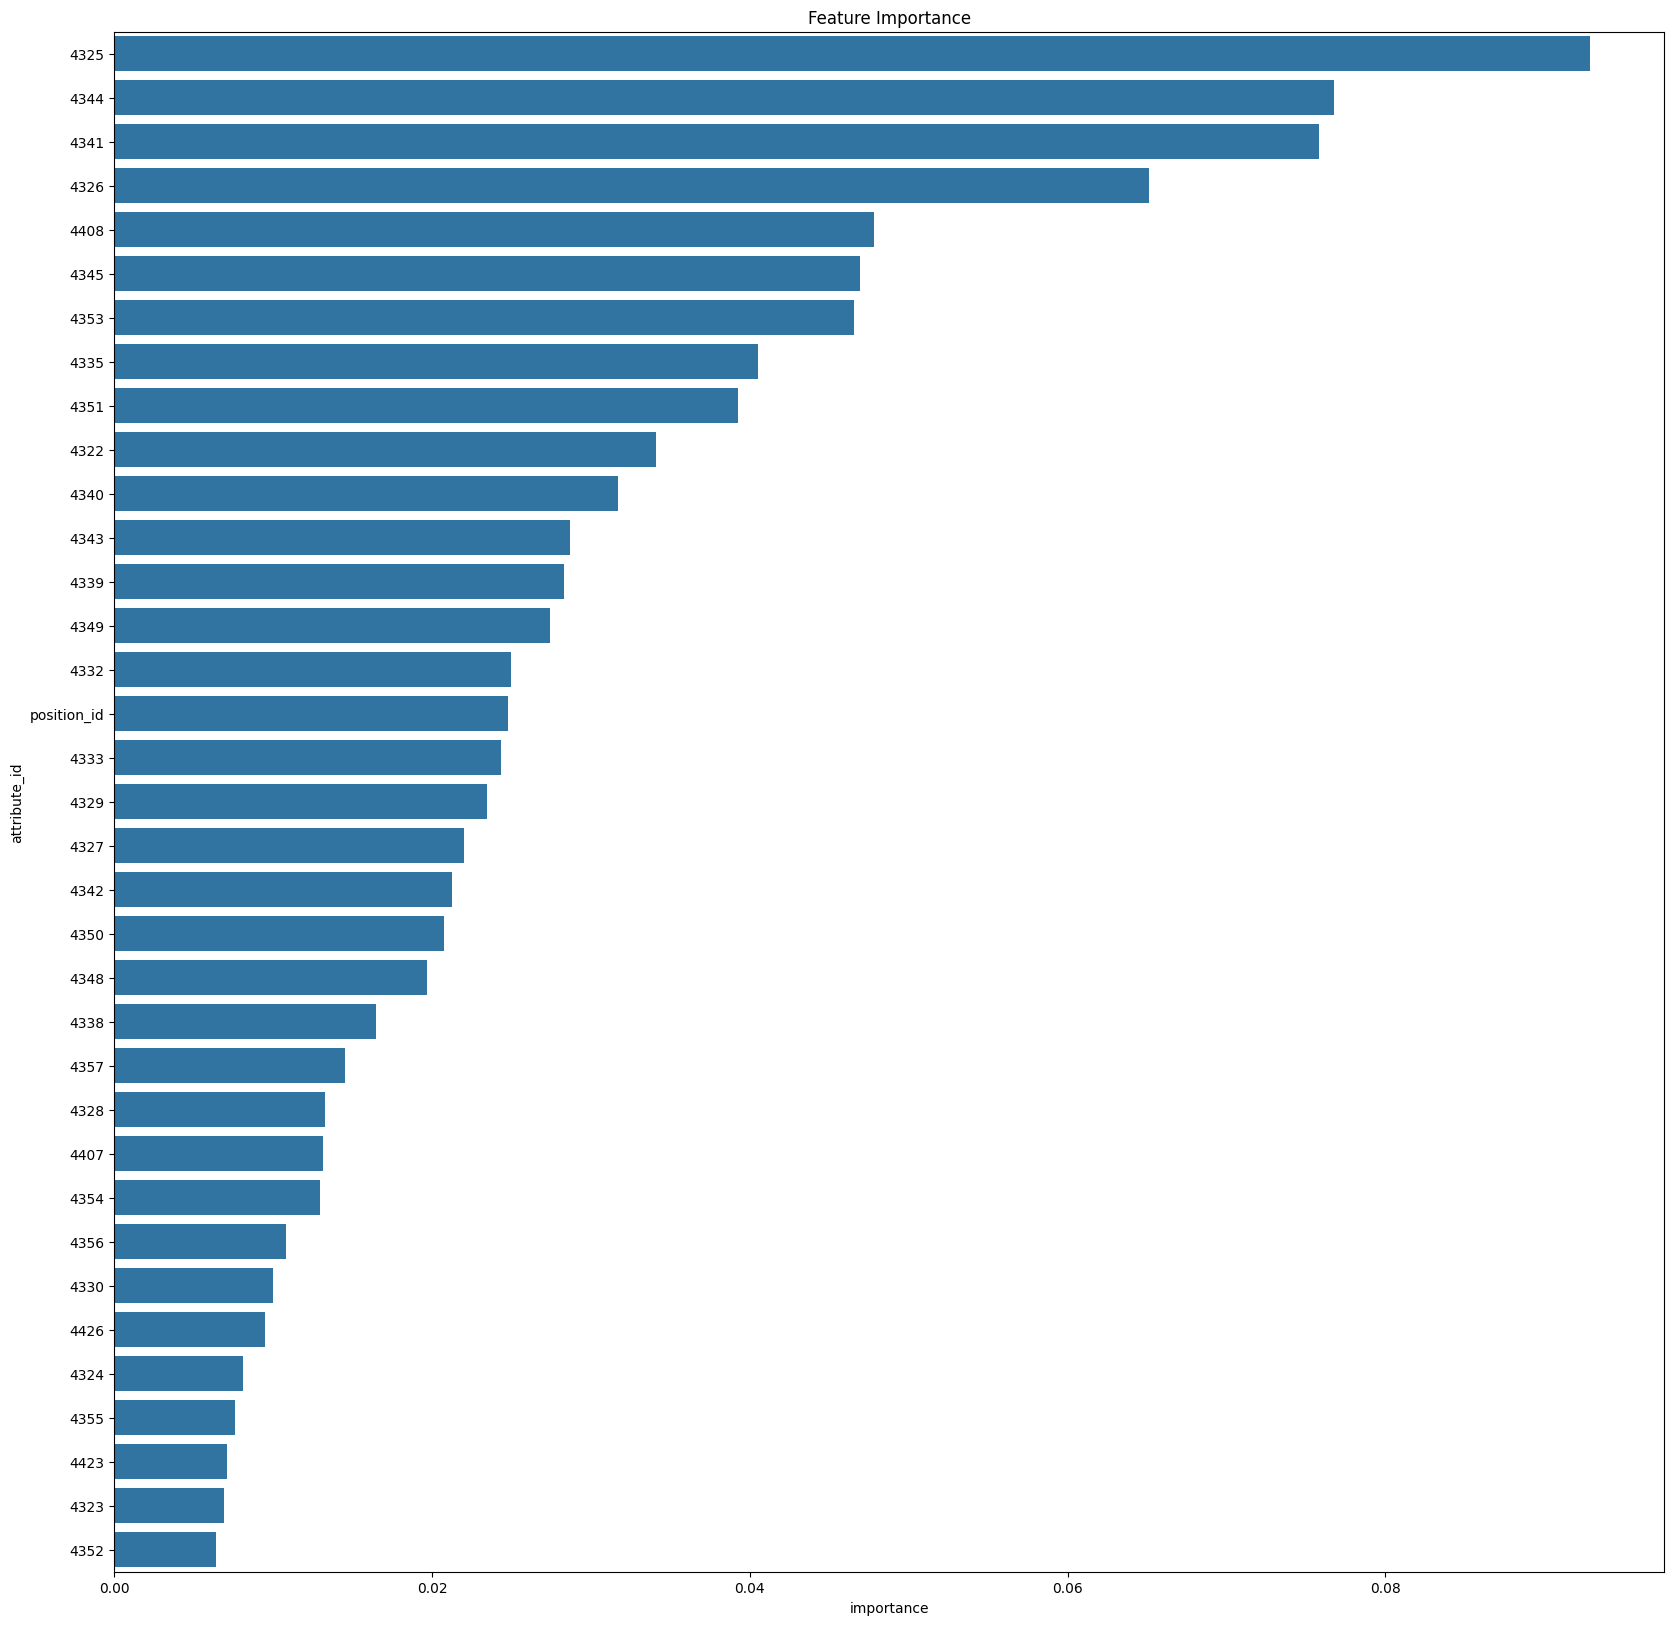

In [42]:
feature_importance = pd.DataFrame(rfc.feature_importances_, index=X_train.columns, columns=["importance"])
feature_importance.sort_values(by="importance", ascending=False, inplace=True)
plt.figure(figsize=(20, 20))
sns.barplot(x=feature_importance.importance, y=feature_importance.index)
plt.title("Feature Importance")
plt.show()

In [50]:
## Hyperparameter Tuning
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, 6, 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

In [51]:
from sklearn.model_selection import RandomizedSearchCV
rfc = RandomForestClassifier()
rscv = RandomizedSearchCV(estimator=rfc, param_distributions=rf_params,n_iter=10,cv=3,verbose=2,n_jobs=-1)
rscv.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 8, 15, None, 10],
                                        'max_features': [5, 7, 6, 8],
                                        'min_samples_split': [2, 8, 15, 20],
                                        'n_estimators': [100, 200, 500, 1000]},
                   verbose=2)

In [52]:
rscv.best_params_

{'n_estimators': 100,
 'min_samples_split': 15,
 'max_features': 5,
 'max_depth': 15}

In [53]:
y_pred = rscv.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[44  0]
 [ 6  5]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        44
           1       1.00      0.45      0.62        11

    accuracy                           0.89        55
   macro avg       0.94      0.73      0.78        55
weighted avg       0.90      0.89      0.87        55

